# Time Series Segmentation
In this notebook, we test ClaSP against rival methods.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [2]:
df_scores = pd.read_csv("scores.csv")

Let's calculate the mean/std error.

In [3]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean(), 5)}")

ClaSP: mean_error=0.00676
FLOSS: mean_error=0.03796
Window-L$_2$: mean_error=0.14442
BinSeg-L$_2$: mean_error=0.31853
BOCD: mean_error=0.17803


In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std(), 5)}")

ClaSP: std_error=0.0132
FLOSS: std_error=0.08931
Window-L$_2$: std_error=0.12829
BinSeg-L$_2$: std_error=0.1613
BOCD: std_error=0.18312


Let's compute the wins per method.

In [5]:
ranks = df_scores.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [6]:
for name in df_scores.columns[1:]:
    print(f"{name}: wins={ranks[ranks[name] == 1].shape[0]}")

ClaSP: wins=59
FLOSS: wins=5
Window-L$_2$: wins=1
BinSeg-L$_2$: wins=0
BOCD: wins=1


Let's plot and output the ranks.

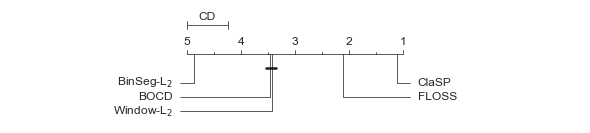

In [7]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=8, reverse=True, textspace=2.5)

In [8]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

ClaSP: rank=1.10606
FLOSS: rank=2.10606
Window-L$_2$: rank=3.42424
BinSeg-L$_2$: rank=4.87879
BOCD: rank=3.4697


Let's compute wins/losses against ClaSP.

In [9]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs FLOSS: (wins/losses/ties): 61/5/0
ClaSP vs Window-L$_2$: (wins/losses/ties): 65/1/0
ClaSP vs BinSeg-L$_2$: (wins/losses/ties): 66/0/0
ClaSP vs BOCD: (wins/losses/ties): 65/1/0
